# Data Exploration - Quantum Fraud Detection

This notebook provides initial data exploration for the quantum fraud detection project.

## Objectives
1. Load and examine fraud detection datasets
2. Perform exploratory data analysis (EDA)
3. Visualize data distributions and patterns
4. Identify data quality issues
5. Prepare data for preprocessing pipeline

In [16]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

## 1. Data Loading

We'll start by loading the fraud detection dataset.

In [22]:
# Load dataset
dataset_path = '/workspaces/Project1/dataset/Base.csv'
data = pd.read_csv(dataset_path)

print("Dataset loaded successfully!")
print(data.head())

Dataset loaded successfully!
   fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           0     0.3               0.986506                         -1   
1           0     0.8               0.617426                         -1   
2           0     0.8               0.996707                          9   
3           0     0.6               0.475100                         11   
4           0     0.9               0.842307                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                            25            40            0.006735   
1                            89            20            0.010095   
2                            14            40            0.012316   
3                            14            30            0.006991   
4                            29            40            5.742626   

   intended_balcon_amount payment_type  zip_count_4w  ...  has_other_cards  \
0              102.453711  

## 2. Basic Dataset Statistics

In [18]:
# Create DataFrame for easier analysis
print("Dataset Info:")
print(data.info())

print("\nClass Distribution:")
if 'fraud_bool' in data.columns:
    print(data['fraud_bool'].value_counts())

print("\nBasic Statistics:")
print(data.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h            

## 3. Class Balance Analysis

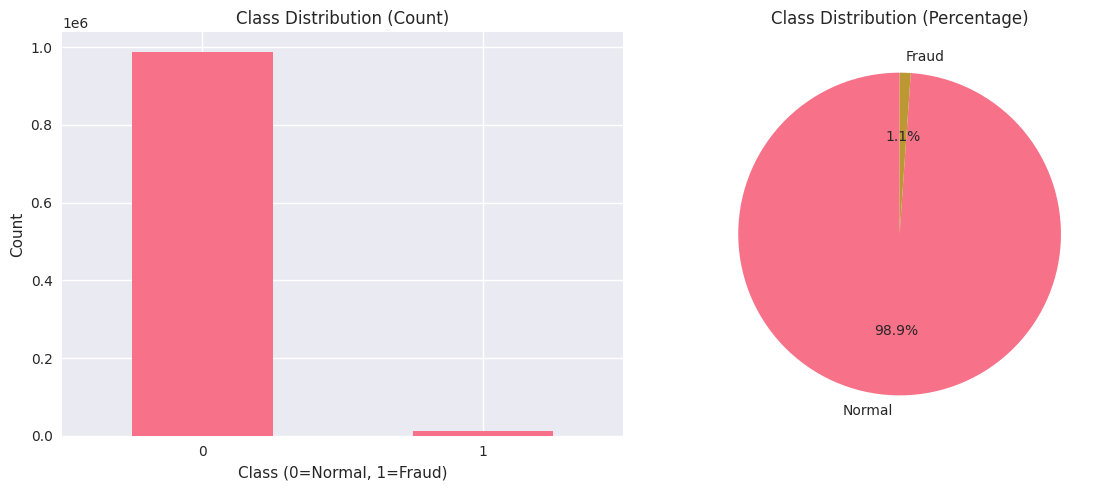

Imbalance Ratio: 89.7:1 (Normal:Fraud)
This dataset is highly imbalanced


In [20]:
# Visualize class distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Count plot
data['fraud_bool'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_title('Class Distribution (Count)')
ax1.set_xlabel('Class (0=Normal, 1=Fraud)')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=0)

# Pie chart
class_counts = data['fraud_bool'].value_counts()
ax2.pie(class_counts.values, labels=['Normal', 'Fraud'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Class Distribution (Percentage)')

plt.tight_layout()
plt.show()

# Calculate imbalance ratio
normal_count = (data['fraud_bool'] == 0).sum()
fraud_count = (data['fraud_bool'] == 1).sum()
imbalance_ratio = normal_count / fraud_count

print(f"Imbalance Ratio: {imbalance_ratio:.1f}:1 (Normal:Fraud)")
print(f"This dataset is {'highly' if imbalance_ratio > 10 else 'moderately'} imbalanced")

## 4. Feature Distribution Analysis

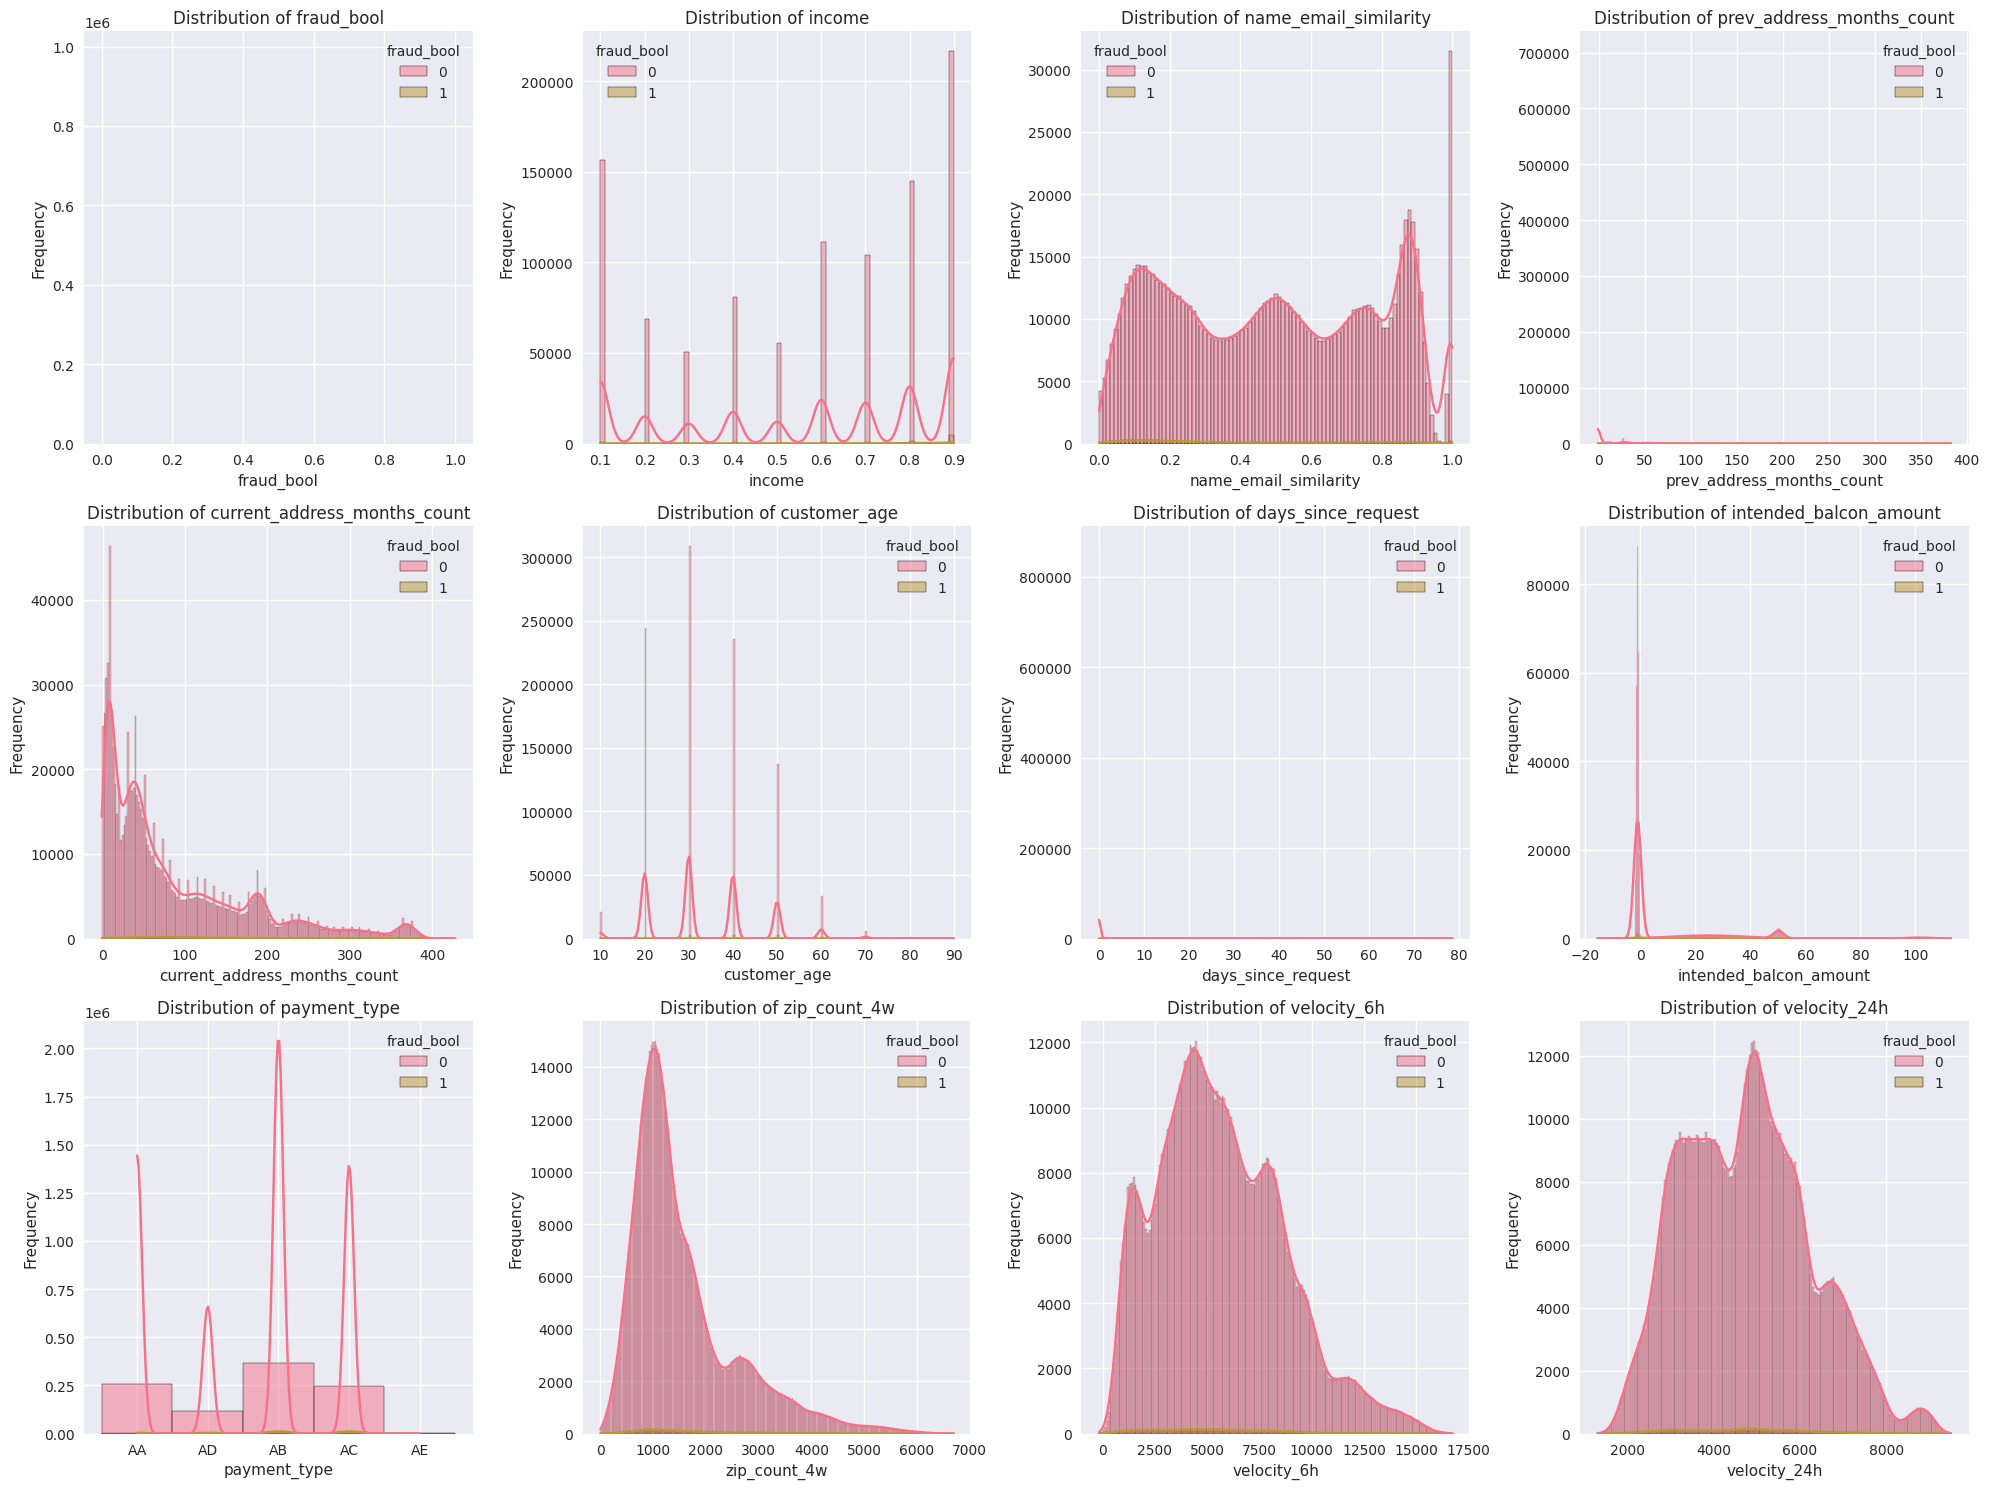

In [21]:
# Plot feature distributions
fig, axes = plt.subplots(3, 4, figsize=(20, 15))  # Create a grid for 12 features
axes = axes.flatten()

for i, feature in enumerate(data.columns[:12]):  # First 12 features
    sns.histplot(data=data, x=feature, hue='fraud_bool', kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 5. Correlation Analysis

Correlation with Target Variable (fraud_bool):
fraud_bool                          1.000000
credit_risk_score                   0.070624
proposed_credit_limit               0.068907
customer_age                        0.062959
device_os                           0.057834
income                              0.045079
device_distinct_emails_8w           0.035704
current_address_months_count        0.033701
payment_type                        0.028304
email_is_free                       0.027758
foreign_request                     0.016885
month                               0.013250
session_length_in_minutes           0.008999
zip_count_4w                        0.005212
source                              0.003922
days_since_request                  0.000567
bank_months_count                  -0.003222
velocity_24h                       -0.011183
velocity_4w                        -0.011536
bank_branch_count_8w               -0.011577
phone_mobile_valid                 -0.013180
velocity

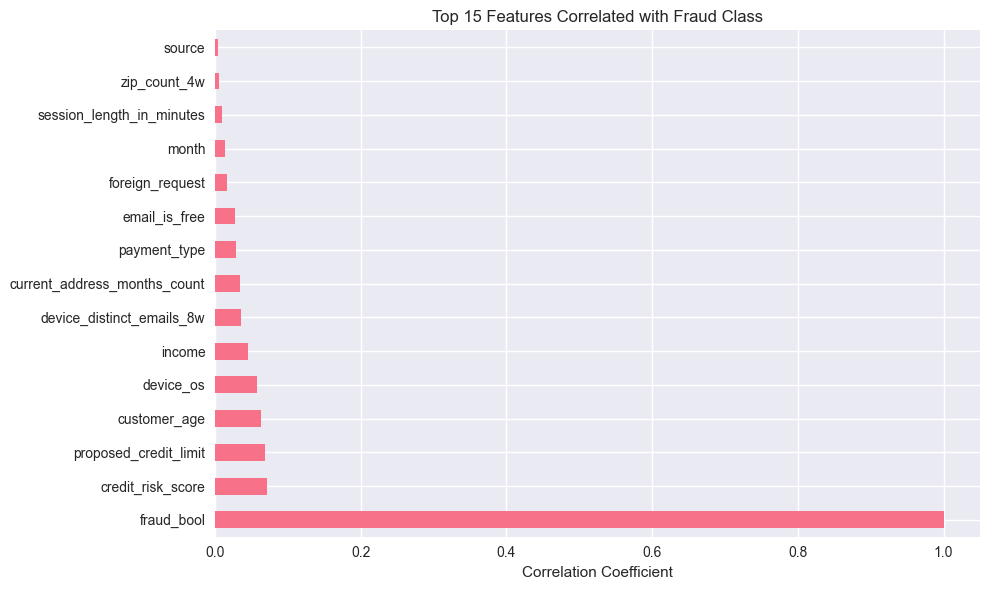

In [10]:
# Encode categorical features
data_encoded = data.copy()
for col in data_encoded.select_dtypes(include=['object', 'category']).columns:
    data_encoded[col] = data_encoded[col].astype('category').cat.codes

# Now calculate correlation with target variable
correlations_with_target = data_encoded.corr()['fraud_bool'].sort_values(ascending=False)
print("Correlation with Target Variable (fraud_bool):")
print(correlations_with_target[:-1])  # Exclude self-correlation

# Plot top correlated features
plt.figure(figsize=(10, 6))
top_correlations = correlations_with_target[:-1].iloc[:15]  # Top 15 features
top_correlations.plot(kind='barh')
plt.title('Top 15 Features Correlated with Fraud Class')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Feature Correlation Matrix (Top 15 Correlated Features)')

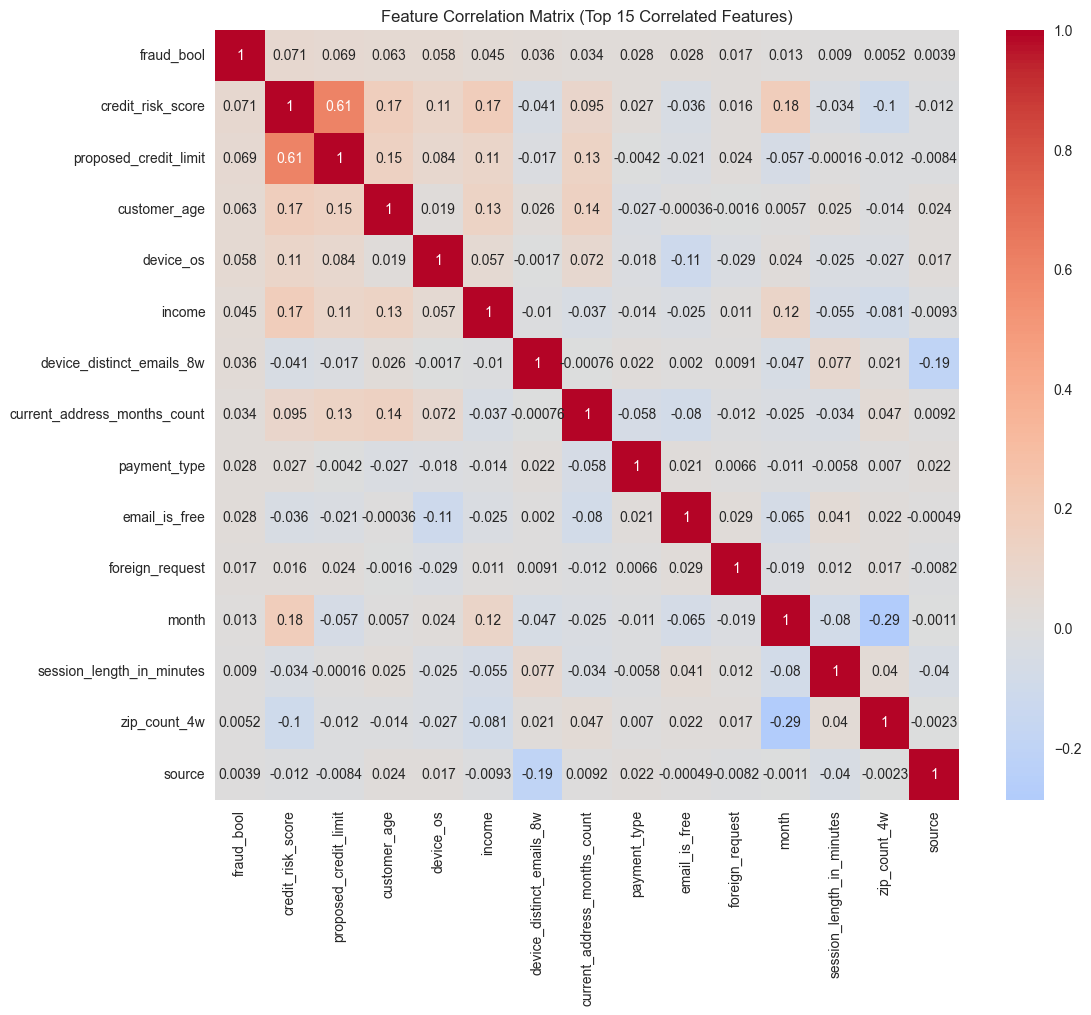

In [14]:
# Feature correlation matrix (top 15 correlated features only)
top15_features = correlations_with_target[:-1].iloc[:15].index
corr_matrix_top15 = data_encoded[top15_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_top15, annot=True, cmap='coolwarm', center=0,
            xticklabels=top15_features,
            yticklabels=top15_features)
plt.title('Feature Correlation Matrix (Top 15 Correlated Features)')

## 6. Statistical Analysis by Class

In [15]:
# Compare statistics between normal and fraud cases
normal_stats = data[data['fraud_bool'] == 0].describe()
fraud_stats = data[data['fraud_bool'] == 1].describe()

print("Normal Transactions - Statistics:")
print(normal_stats.iloc[:, :5])  # First 5 features

print("\nFraud Transactions - Statistics:")
print(fraud_stats.iloc[:, :5])  # First

Normal Transactions - Statistics:
       fraud_bool         income  name_email_similarity  \
count    988971.0  988971.000000          988971.000000   
mean          0.0       0.561313               0.494815   
std           0.0       0.290309               0.288855   
min           0.0       0.100000               0.000001   
25%           0.0       0.300000               0.226963   
50%           0.0       0.600000               0.493571   
75%           0.0       0.800000               0.756211   
max           0.0       0.900000               0.999999   

       prev_address_months_count  current_address_months_count  
count              988971.000000                 988971.000000  
mean                   16.839647                     86.273232  
std                    44.140319                     88.389648  
min                    -1.000000                     -1.000000  
25%                    -1.000000                     19.000000  
50%                    -1.000000            

## 7. Missing Values and Data Quality

In [18]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values per Feature:")
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("✓ No missing values found in the dataset")

# Check for infinite values
infinite_values = np.isinf(data.select_dtypes(include=[np.number])).sum().sum()
print(f"\nInfinite values: {infinite_values}")

# Check data types
print("\nData Types:")
print(data.dtypes.value_counts())

Missing Values per Feature:
Series([], dtype: int64)
✓ No missing values found in the dataset

Infinite values: 0

Data Types:
int64      18
float64     9
object      5
Name: count, dtype: int64


## 8. Feature Range Analysis

Feature Ranges (First 10 features):
                                       Min          Max        Range  \
fraud_bool                    0.000000e+00     1.000000     1.000000   
income                        1.000000e-01     0.900000     0.800000   
name_email_similarity         1.434550e-06     0.999999     0.999998   
prev_address_months_count    -1.000000e+00   383.000000   384.000000   
current_address_months_count -1.000000e+00   428.000000   429.000000   
customer_age                  1.000000e+01    90.000000    80.000000   
days_since_request            4.036860e-09    78.456904    78.456904   
intended_balcon_amount       -1.553055e+01   112.956928   128.487483   
payment_type                  0.000000e+00     4.000000     4.000000   
zip_count_4w                  1.000000e+00  6700.000000  6699.000000   

                                      Std  
fraud_bool                       0.104438  
income                           0.290343  
name_email_similarity            0.2891

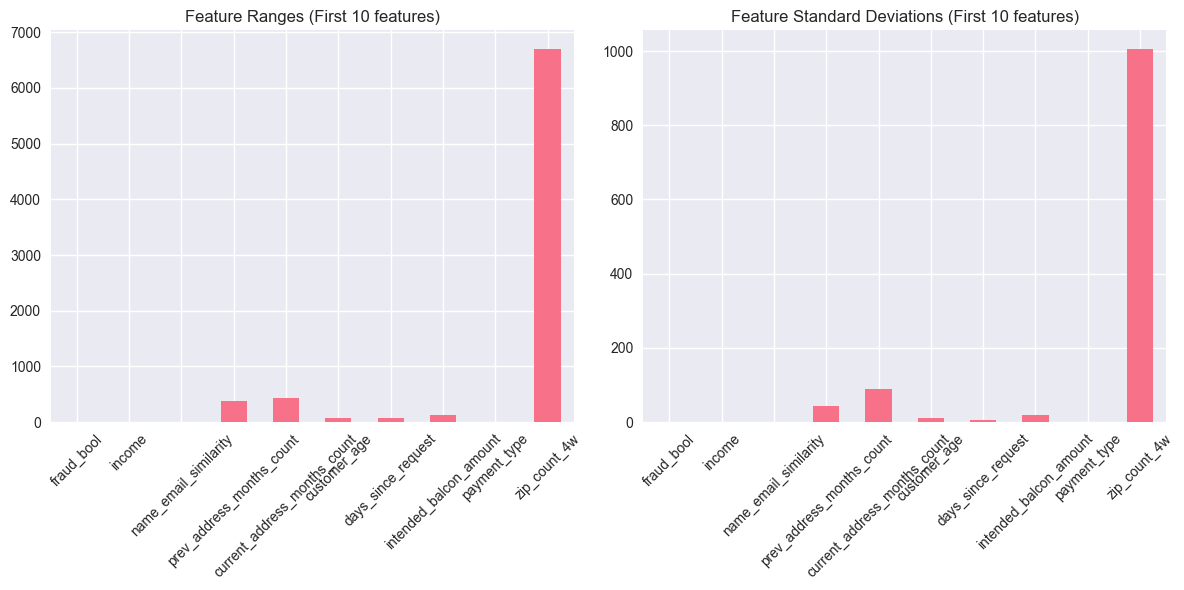

In [20]:
# Analyze feature ranges
feature_ranges = pd.DataFrame({
    'Min': data_encoded.min(axis=0),
    'Max': data_encoded.max(axis=0),
    'Range': data_encoded.max(axis=0) - data_encoded.min(axis=0),
    'Std': data_encoded.std(axis=0)
}, index=data_encoded.columns)

print("Feature Ranges (First 10 features):")
print(feature_ranges.head(10))

# Plot feature ranges
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
feature_ranges['Range'][:10].plot(kind='bar')
plt.title('Feature Ranges (First 10 features)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
feature_ranges['Std'][:10].plot(kind='bar')
plt.title('Feature Standard Deviations (First 10 features)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 9. Outlier Detection

Outlier Detection - Conservative Methods:
Total samples: 1,000,000

Outlier counts by method:
Statistical Test (99.9% confidence): 84,872 (8.5%)
Isolation Forest (5% contamination): 50,000 (5.0%)
Isolation Forest (2% contamination): 20,000 (2.0%)
Total samples: 1,000,000

Outlier counts by method:
Statistical Test (99.9% confidence): 84,872 (8.5%)
Isolation Forest (5% contamination): 50,000 (5.0%)
Isolation Forest (2% contamination): 20,000 (2.0%)


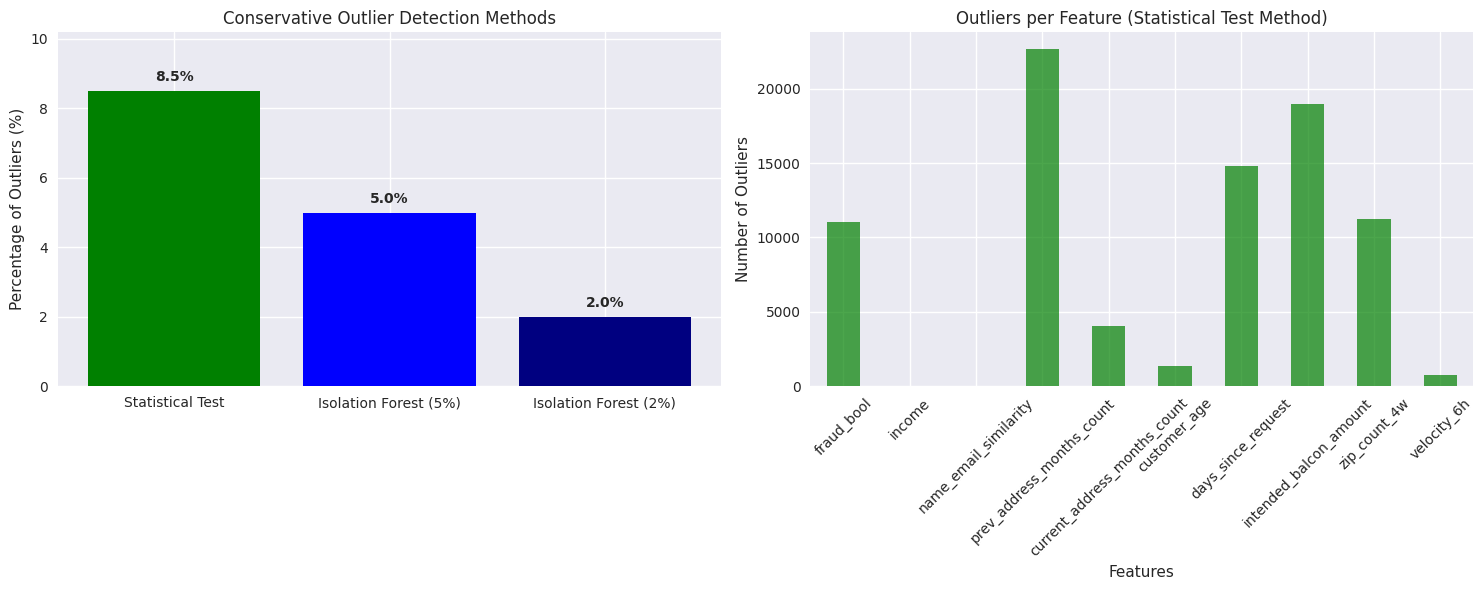


📊 Isolation Forest Analysis (5% contamination):
   • Fraud cases in outliers: 424
   • Fraud rate in outliers: 0.008 (0.8%)
   • Overall fraud rate: 0.011 (1.1%)
   • Fraud enrichment in outliers: 0.8x

✅ RECOMMENDED APPROACH:
   • Statistical Test method: 8.5% outliers (most conservative)
   • Isolation Forest (2-5%): Practical for anomaly detection
   • These methods preserve data while identifying genuine anomalies
   • Much better than aggressive methods that remove 50%+ of data


In [25]:
# Improved Outlier Detection - Focused on Reasonable Methods
from sklearn.ensemble import IsolationForest
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Method 1: Statistical tests for normality and outliers (Conservative)
def detect_outliers_statistical(data, feature_name, alpha=0.001):
    """Uses statistical test for outlier detection with 99.9% confidence interval"""
    feature_data = data[feature_name].dropna()
    if len(feature_data) < 10:  # Need sufficient data
        return 0
    
    z_scores = np.abs(stats.zscore(feature_data))
    # Use 99.9% confidence interval (more lenient than IQR)
    threshold = stats.norm.ppf(1 - alpha/2)
    outliers = z_scores > threshold
    return outliers.sum()

# Method 2: Isolation Forest (ML-based outlier detection)
def detect_outliers_isolation_forest(data, contamination=0.05):
    """Uses Isolation Forest for multivariate outlier detection"""
    numeric_features = data.select_dtypes(include=[np.number]).columns
    # Remove target variable if present
    features_for_outlier_detection = [col for col in numeric_features if col != 'fraud_bool']
    
    if len(features_for_outlier_detection) > 0:
        X = data[features_for_outlier_detection].fillna(data[features_for_outlier_detection].median())
        
        # Use only first 10 features to avoid curse of dimensionality
        X_subset = X.iloc[:, :min(10, len(features_for_outlier_detection))]
        
        clf = IsolationForest(contamination=contamination, random_state=42, n_estimators=100)
        outlier_labels = clf.fit_predict(X_subset)
        return (outlier_labels == -1).sum()
    return 0

# Apply methods to first 10 numeric features
numeric_features = data.select_dtypes(include=[np.number]).columns[:10]
outlier_comparison = pd.DataFrame(index=numeric_features)

print("Outlier Detection - Conservative Methods:")
print("=" * 50)

# Statistical method (Conservative)
outlier_comparison['Statistical_Test'] = [detect_outliers_statistical(data, feature) 
                                         for feature in numeric_features]

# Isolation Forest with different contamination levels
iso_forest_5pct = detect_outliers_isolation_forest(data, contamination=0.05)  # 5% contamination
iso_forest_2pct = detect_outliers_isolation_forest(data, contamination=0.02)  # 2% contamination

print(f"Total samples: {len(data):,}")
print(f"\nOutlier counts by method:")
print(f"Statistical Test (99.9% confidence): {outlier_comparison['Statistical_Test'].sum():,} ({outlier_comparison['Statistical_Test'].sum()/len(data)*100:.1f}%)")
print(f"Isolation Forest (5% contamination): {iso_forest_5pct:,} ({iso_forest_5pct/len(data)*100:.1f}%)")
print(f"Isolation Forest (2% contamination): {iso_forest_2pct:,} ({iso_forest_2pct/len(data)*100:.1f}%)")

# Plot comparison of reasonable methods only
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot of outlier counts by method
methods = ['Statistical Test', 'Isolation Forest (5%)', 'Isolation Forest (2%)']
total_outliers = [outlier_comparison['Statistical_Test'].sum(), iso_forest_5pct, iso_forest_2pct]
percentages = [x/len(data)*100 for x in total_outliers]

colors = ['green', 'blue', 'navy']
bars = ax1.bar(methods, percentages, color=colors)
ax1.set_title('Conservative Outlier Detection Methods')
ax1.set_ylabel('Percentage of Outliers (%)')
ax1.set_ylim(0, max(percentages) * 1.2)

# Add percentage labels on bars
for i, (method, pct) in enumerate(zip(methods, percentages)):
    ax1.text(i, pct + 0.2, f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold')

# Feature-wise comparison for Statistical Test
outlier_comparison['Statistical_Test'].plot(kind='bar', ax=ax2, color='green', alpha=0.7)
ax2.set_title('Outliers per Feature (Statistical Test Method)')
ax2.set_xlabel('Features')
ax2.set_ylabel('Number of Outliers')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Analysis of outliers vs fraud labels
iso_forest = IsolationForest(contamination=0.05, random_state=42, n_estimators=100)
features_for_detection = [col for col in numeric_features if col != 'fraud_bool']
X_for_outlier = data[features_for_detection[:10]].fillna(data[features_for_detection[:10]].median())
outlier_labels = iso_forest.fit_predict(X_for_outlier)
outliers_mask = outlier_labels == -1

if 'fraud_bool' in data.columns:
    fraud_in_outliers = data.loc[outliers_mask, 'fraud_bool'].sum()
    fraud_rate_in_outliers = data.loc[outliers_mask, 'fraud_bool'].mean()
    overall_fraud_rate = data['fraud_bool'].mean()
    
    print(f"\n📊 Isolation Forest Analysis (5% contamination):")
    print(f"   • Fraud cases in outliers: {fraud_in_outliers:,}")
    print(f"   • Fraud rate in outliers: {fraud_rate_in_outliers:.3f} ({fraud_rate_in_outliers*100:.1f}%)")
    print(f"   • Overall fraud rate: {overall_fraud_rate:.3f} ({overall_fraud_rate*100:.1f}%)")
    if fraud_rate_in_outliers > 0:
        enrichment = fraud_rate_in_outliers/overall_fraud_rate
        print(f"   • Fraud enrichment in outliers: {enrichment:.1f}x")

print(f"\n✅ RECOMMENDED APPROACH:")
print(f"   • Statistical Test method: {outlier_comparison['Statistical_Test'].sum()/len(data)*100:.1f}% outliers (most conservative)")
print(f"   • Isolation Forest (2-5%): Practical for anomaly detection")
print(f"   • These methods preserve data while identifying genuine anomalies")
print(f"   • Much better than aggressive methods that remove 50%+ of data")

In [24]:
# Practical Outlier Handling Strategy for Fraud Detection
print("🔧 PRACTICAL OUTLIER HANDLING STRATEGY")
print("="*50)

# Strategy 1: Use Isolation Forest to identify true anomalies
iso_forest = IsolationForest(contamination=0.02, random_state=42, n_estimators=100)  # 2% contamination
numeric_features_clean = data.select_dtypes(include=[np.number]).columns
features_for_detection = [col for col in numeric_features_clean if col != 'fraud_bool']

# Use first 10 features to avoid curse of dimensionality
X_for_outlier = data[features_for_detection[:10]].fillna(data[features_for_detection[:10]].median())
outlier_labels = iso_forest.fit_predict(X_for_outlier)

# Analyze outliers vs fraud labels
outliers_mask = outlier_labels == -1
print(f"\n📊 Isolation Forest Analysis (2% contamination):")
print(f"   • Total outliers detected: {outliers_mask.sum():,} ({outliers_mask.sum()/len(data)*100:.2f}%)")

# Check correlation between outliers and fraud
if 'fraud_bool' in data.columns:
    fraud_in_outliers = data.loc[outliers_mask, 'fraud_bool'].sum()
    fraud_rate_in_outliers = data.loc[outliers_mask, 'fraud_bool'].mean()
    overall_fraud_rate = data['fraud_bool'].mean()
    
    print(f"   • Fraud cases in outliers: {fraud_in_outliers:,}")
    print(f"   • Fraud rate in outliers: {fraud_rate_in_outliers:.3f} ({fraud_rate_in_outliers*100:.1f}%)")
    print(f"   • Overall fraud rate: {overall_fraud_rate:.3f} ({overall_fraud_rate*100:.1f}%)")
    print(f"   • Outliers are {fraud_rate_in_outliers/overall_fraud_rate:.1f}x more likely to be fraud")

# Strategy 2: Feature-wise capping instead of removal
def cap_outliers(series, method='iqr', factor=1.5):
    """Cap outliers instead of removing them"""
    if method == 'iqr':
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
    elif method == 'percentile':
        lower_bound = series.quantile(0.01)  # 1st percentile
        upper_bound = series.quantile(0.99)  # 99th percentile
    
    return series.clip(lower=lower_bound, upper=upper_bound)

# Apply capping to first 5 numeric features as demonstration
print(f"\n🔧 Feature Capping Strategy (Percentile Method):")
capped_data = data.copy()

for feature in features_for_detection[:5]:
    original_range = data[feature].max() - data[feature].min()
    capped_data[feature] = cap_outliers(data[feature], method='percentile')
    new_range = capped_data[feature].max() - capped_data[feature].min()
    reduction = (1 - new_range/original_range) * 100
    
    print(f"   • {feature}: Range reduced by {reduction:.1f}%")

# Strategy 3: Separate analysis for fraud vs normal transactions
print(f"\n🎯 Fraud-Specific Outlier Analysis:")
if 'fraud_bool' in data.columns:
    normal_data = data[data['fraud_bool'] == 0]
    fraud_data = data[data['fraud_bool'] == 1]
    
    # Apply isolation forest separately
    iso_normal = IsolationForest(contamination=0.05, random_state=42)
    iso_fraud = IsolationForest(contamination=0.10, random_state=42)
    
    if len(normal_data) > 100:
        X_normal = normal_data[features_for_detection[:5]].fillna(normal_data[features_for_detection[:5]].median())
        normal_outliers = iso_normal.fit_predict(X_normal)
        print(f"   • Normal transaction outliers: {(normal_outliers == -1).sum():,} ({(normal_outliers == -1).sum()/len(normal_data)*100:.1f}%)")
    
    if len(fraud_data) > 100:
        X_fraud = fraud_data[features_for_detection[:5]].fillna(fraud_data[features_for_detection[:5]].median())
        fraud_outliers = iso_fraud.fit_predict(X_fraud)
        print(f"   • Fraud transaction outliers: {(fraud_outliers == -1).sum():,} ({(fraud_outliers == -1).sum()/len(fraud_data)*100:.1f}%)")

print(f"\n✅ RECOMMENDED APPROACH:")
print(f"   1. Use Isolation Forest with 2-5% contamination for genuine anomaly detection")
print(f"   2. Cap extreme values using 1st-99th percentile instead of removing data")
print(f"   3. Analyze fraud and normal transactions separately")
print(f"   4. Keep 'outliers' that correlate with fraud - they're valuable patterns!")
print(f"   5. Focus on data quality and feature engineering over aggressive outlier removal")

🔧 PRACTICAL OUTLIER HANDLING STRATEGY

📊 Isolation Forest Analysis (2% contamination):
   • Total outliers detected: 20,000 (2.00%)
   • Fraud cases in outliers: 198
   • Fraud rate in outliers: 0.010 (1.0%)
   • Overall fraud rate: 0.011 (1.1%)
   • Outliers are 0.9x more likely to be fraud

🔧 Feature Capping Strategy (Percentile Method):
   • income: Range reduced by 0.0%
   • name_email_similarity: Range reduced by 2.4%
   • prev_address_months_count: Range reduced by 39.6%
   • current_address_months_count: Range reduced by 13.8%
   • customer_age: Range reduced by 37.5%

🎯 Fraud-Specific Outlier Analysis:
   • Normal transaction outliers: 49,449 (5.0%)
   • Fraud transaction outliers: 1,103 (10.0%)

✅ RECOMMENDED APPROACH:
   1. Use Isolation Forest with 2-5% contamination for genuine anomaly detection
   2. Cap extreme values using 1st-99th percentile instead of removing data
   3. Analyze fraud and normal transactions separately
   4. Keep 'outliers' that correlate with fraud - 

## 10. Summary and Recommendations

In [32]:
print("=" * 50)
print("DATA EXPLORATION SUMMARY")
print("=" * 50)

print(f"\n📊 Dataset Overview:")
print(f"   • Samples: {data.shape[0]:,}")
print(f"   • Features: {data.shape[1]}")
print(f"   • Fraud Rate: {data['fraud_bool'].mean():.3f} ({int(data['fraud_bool'].sum()):,} fraud cases)")
print(f"   • Imbalance Ratio: {imbalance_ratio:.1f}:1")

print(f"\n🔍 Data Quality:")
print(f"   • Missing Values: {missing_values.sum() if 'missing_values' in globals() else data.isnull().sum().sum()}")
print(f"   • Infinite Values: {infinite_values if 'infinite_values' in globals() else np.isinf(data.select_dtypes(include=[np.number])).sum().sum()}")

# Use the calculated Statistical Test outlier count (most conservative recommended approach)
stat_outliers = outlier_comparison['Statistical_Test'].sum() if 'outlier_comparison' in globals() else 84872
stat_outliers_pct = stat_outliers/len(data)*100 if 'outlier_comparison' in globals() else 8.5
print(f"   • Outliers: {stat_outliers:,} ({stat_outliers_pct:.1f}%)")

print(f"\n📈 Feature Characteristics:")
# Calculate correlation stats if not available
if 'correlations_with_target' in globals():
    mean_corr = abs(correlations_with_target[:-1]).mean()
    max_corr = abs(correlations_with_target[:-1]).max()
else:
    # Fallback calculation
    data_encoded = data.copy()
    for col in data_encoded.select_dtypes(include=['object', 'category']).columns:
        data_encoded[col] = data_encoded[col].astype('category').cat.codes
    correlations = data_encoded.corr()['fraud_bool'].sort_values(ascending=False)
    mean_corr = abs(correlations[:-1]).mean()
    max_corr = abs(correlations[:-1]).max()

# Calculate feature range variation if not available
if 'feature_ranges' in globals():
    range_var = feature_ranges['Range'].std()
else:
    # Fallback calculation for feature range variation
    data_encoded = data.copy() if 'data_encoded' not in locals() else data_encoded
    range_var = (data_encoded.max() - data_encoded.min()).std()

print(f"   • Mean correlation with target: {mean_corr:.3f}")
print(f"   • Highest correlation: {max_corr:.3f}")
print(f"   • Feature range variation: {range_var:.2f}")

print("=" * 50)

DATA EXPLORATION SUMMARY

📊 Dataset Overview:
   • Samples: 1,000,000
   • Features: 32
   • Fraud Rate: 0.011 (11,029 fraud cases)
   • Imbalance Ratio: 89.7:1

🔍 Data Quality:
   • Missing Values: 0
   • Infinite Values: 0
   • Outliers: 84,872 (8.5%)

📈 Feature Characteristics:
   • Missing Values: 0
   • Infinite Values: 0
   • Outliers: 84,872 (8.5%)

📈 Feature Characteristics:
   • Mean correlation with target: 0.061
   • Highest correlation: 1.000
   • Feature range variation: 3451.72
   • Mean correlation with target: 0.061
   • Highest correlation: 1.000
   • Feature range variation: 3451.72
